In [1]:
from simulation import simulateSlowChanges
import numpy as np
from utils import plotUtils
from utils import modelUtils
from utils import simulaltionUtils
from utils import statisticsUtils as statistics
import Configurations
from tensorflow import keras
import math
import matplotlib.pyplot as plt
from random import randrange
from models import cusum_chart
import joblib


Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10
randomshift ist: False
shift-value= 0.5  and  3.0
main dir: ../


In [2]:
def generateShiftMeanList(shiftStartPoint,numberOfSubgroups ,shiftValue):
    meansList = []
    #shiftEndPoint = randrange(Configurations.numberOfPointsInARow_shift,numberOfSubgroups+1)
    shiftEndPoint = numberOfSubgroups+1
    m_0 = Configurations.mean
    for mean in range(numberOfSubgroups):
        if(mean >= shiftStartPoint and mean <= shiftEndPoint):
            meansList.append(m_0+shiftValue)   
        else:
            meansList.append(m_0)
    return meansList

def standraizer(normalDistribution,mean,size):
    standardized = ((statistics.mean(normalDistribution)-mean) /
             Configurations.sigma) * math.sqrt(size)

    return standardized
def getNormalDistribution(mean, standardDeviation,size):
    return np.random.normal(loc=mean, scale=standardDeviation,
                            size=size)
def samplesGenerator(meansList, standardDeviation):
    samples = []
    number_of_subgroups = len(meansList)
    mean = Configurations.mean
    for i in range(number_of_subgroups):
        normal = getNormalDistribution(meansList[i], standardDeviation,number_of_subgroups)
        x =standraizer(normal,mean,number_of_subgroups)
        samples.append(x)
    return samples

True True


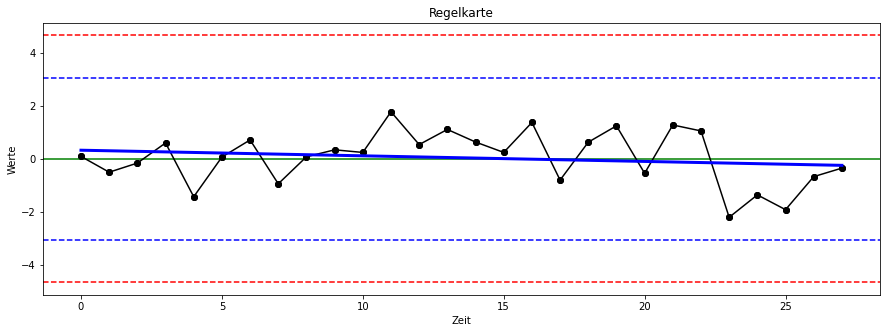

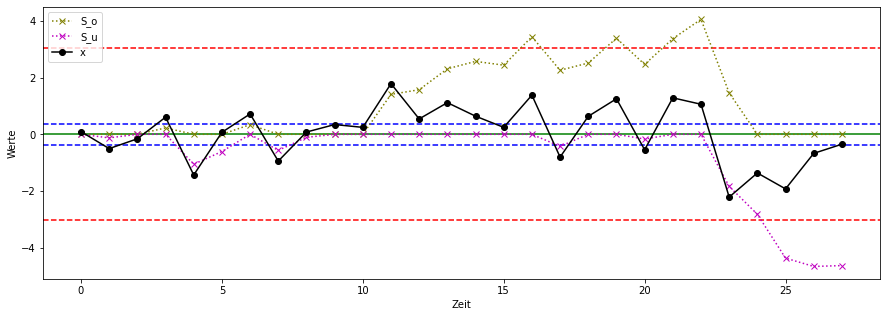

In [28]:
meanList = generateShiftMeanList(2,Configurations.neuralInputsNumber,0.08)
#print(meanList)
chart=simulaltionUtils.samplesGenerator(meanList,Configurations.standardDeviation)
plotUtils.figsize=15
plotUtils.plotChart(chart,"Regelkarte")
slope = plotUtils.plotSlope(chart)
x= chart
#print(chart)
cusum_chart.print_cusum(chart)
S_o_max,S_u_min=cusum_chart.predict(chart)
print(S_o_max,S_u_min)


In [19]:

#x= [1.3208288409029763, -0.939852103200773, 0.13947485212557556, -1.6801882645688135, 0.6658678622899626, -0.4068651975277853, 0.45407077311160643, 0.5506268065641703, 1.7341455561877361, -0.35725803392308275, 1.9027728231617054, -0.12556956709789047, 1.4230008853871183, 0.5935772084219948, -0.13602084493616412, -0.0863151242820933, 0.919464801806325, -0.42627120182009626, 0.06729212251493814, -0.7855090359258387, 0.9131211038966847, 0.7901466800400571, -0.2693289135382396, 0.8060900855181512, 1.9807279760006298, -0.34688937820250243, 1.70719195058983, -0.12395584189380915]
suffix ="classification"
#rf_model = joblib.load(Configurations.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
dnn_model=keras.models.load_model(Configurations.model_output_path+suffix+'/dnn_model_'+suffix+'.h5')

def dnn_model_predict(chart):
    predictions= dnn_model.predict(chart)
    predictions = np.round(predictions)
    detections = modelUtils.getDetectionLabel_for_5y(predictions)
    predictions = predictions.astype(int)
    return predictions,detections

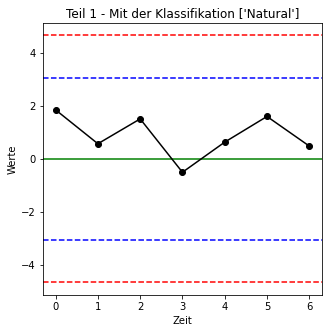

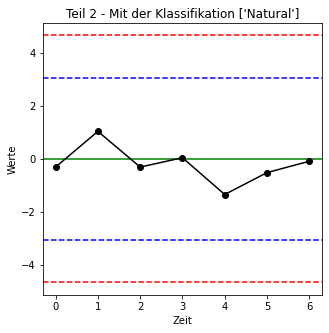

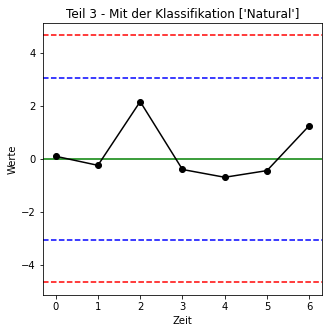

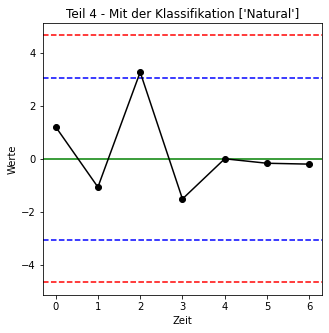

In [20]:

#charts = np.array_split(np.asanyarray(x[0]), 4)
charts = np.array_split(np.asanyarray(x), 4)
plotUtils.figsize=5
i = 1
for chart in charts:
    chart = np.asanyarray( [chart])
    predictions,detections = dnn_model_predict(chart)
    plotUtils.plotChart(chart[0],"Teil {} - Mit der Klassifikation {}".format(i,detections) )
    i = i+1
    # predictions= rf_model.predict(chart)
    # predictions = np.round(predictions)
    # print(predictions)

Der Prozess außer Kontrolle.
Der Prozess außer Kontrolle.
Der Prozess außer Kontrolle.
Der Prozess außer Kontrolle.


<AxesSubplot:xlabel='Zeit', ylabel='Werte'>

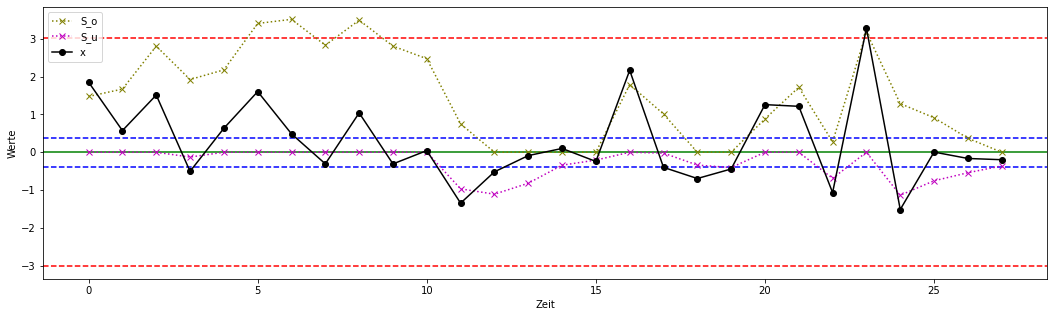

In [23]:
#subgroups= x[0]
subgroups= x
n = 28
sigma = 4
mean = 0
d = 0.5
B = 4
S_o = 0
S_u = 0
S_o_history = []
S_u_history = []
k = d*(sigma/math.sqrt(n))
H = B*(sigma/math.sqrt(n))
for subgroup in subgroups:
    S_o = max(S_o + (subgroup - mean - k), 0)
    S_o_history.append(S_o)
    S_u = min(S_u + (subgroup - mean + k), 0)
    S_u_history.append(S_u)
    if(S_o > (mean + H) or S_u < (mean - H) ):
        print("Der Prozess außer Kontrolle.")

plotUtils.figsize=18
plotUtils.plotCusumChart(subgroups,S_o_history,S_u_history,k,H,"")


[1.8551855010177147, 0.5733823996332302, 1.514528916608787, -0.5056585344617058, 0.6344718373866731, 1.6063603528892845, 0.4861909073246784, -0.3072174414155738, 1.0415336420352543, -0.30864570124881485, 0.04401131122517294, -1.347553893153755, -0.5186100120513384, -0.08862618712961283, 0.10045612183520547, -0.24353029659999093, 2.1689625017025613, -0.40039110755169977, -0.6955663468815133, -0.44308976193135835, 1.260854979715736, 1.2163199133220823, -1.0677952311579124, 3.283871923979138, -1.5160710768013428, 0.004595303774802558, -0.16469772951273276, -0.1977905231862447]


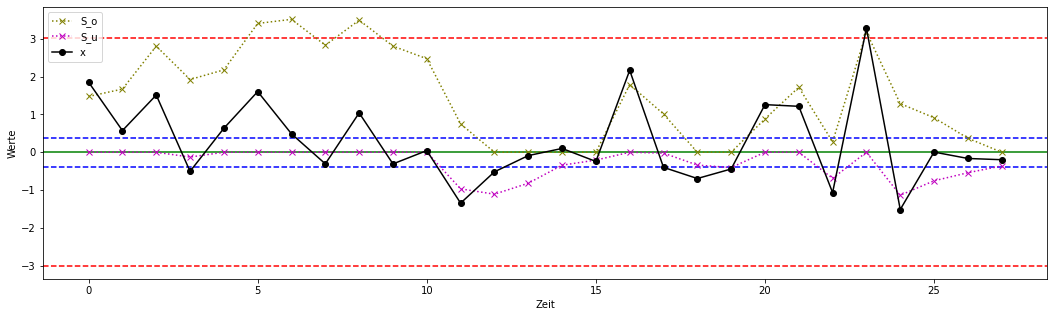

In [27]:
plotUtils.figsize=18
plotUtils.plotCusumChart(subgroups,S_o_history,S_u_history,k,H,"")
print(subgroups)